# Set the environement

In [ ]:
# Importing packages that do not require pip installation
import os
import sys
import re
from google.colab import auth, drive , files
from googleapiclient.discovery import build
from google.auth.transport.requests import Request
import csv
import pandas as pd
import numpy as np
import nltk

from sentence_transformers import SentenceTransformer

nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

# Load the SBERT model
model_SE = SentenceTransformer('all-mpnet-base-v2')

from nltk.stem import PorterStemmer
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu
from nltk.stem import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set((" ".join(stopwords.words('english'))).lower().split(' '))
import ast

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import re

# Now, the packages where pip install is needed

try:
    from mistralai import Mistral
except ImportError:
    !pip install mistralai
    from mistralai import Mistral

try:
    from tqdm.notebook import tqdm
except ImportError:
    !pip install tqdm
    from tqdm.notebook import tqdm

try:
    from mistral_common.tokens.tokenizers.mistral import MistralTokenizer
except ImportError:
    !pip install mistral_common
    from mistral_common.tokens.tokenizers.mistral import MistralTokenizer

tokenizer = MistralTokenizer.from_model("pixtral-12b-2409")

try:
    from mistral_common.protocol.instruct.messages import UserMessage
except ImportError:
    !pip install mistral_common
    from mistral_common.protocol.instruct.messages import UserMessage

try:
    from mistral_common.protocol.instruct.request import ChatCompletionRequest
except ImportError:
    !pip install mistral_common
    from mistral_common.protocol.instruct.request import ChatCompletionRequest

try:
    from mistral_common.protocol.instruct.tool_calls import Function, Tool
except ImportError:
    !pip install mistral_common
    from mistral_common.protocol.instruct.tool_calls import Function, Tool

try:
    from rouge_metric import PyRouge
except ImportError:
    !pip install rouge-metric
    from rouge_metric import PyRouge

# try:
#     from bert_score import BERTScorer
# except ImportError:
#     !pip install bert-score
#     from bert_score import BERTScorer

!pip install POT
import gensim.downloader as api
from gensim.models import KeyedVectors

import spacy

# Load pre-trained English model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/mistral_common/tokens/tokenizers/mistral.py:152: FutureWarning: Calling `MistralTokenizer.from_model(..., strict=False)` is deprecated as it can lead to incorrect tokenizers. It is strongly recommended to use MistralTokenizer.from_model(..., strict=True)` which will become the default in `mistral_common=1.6.0`.If you are using `mistral_common` for open-sourced model weights, we recommend using `MistralTokenizer.from_file('<path/to/tokenizer/file>')` instead.
  warnings.warn(


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 48.5 MB/s eta 0:00:00


In [ ]:
# Load pre-trained Word2Vec model (Google News 300D)
model_w2v = api.load('word2vec-google-news-300')

NameError: name 'api' is not defined

In [ ]:
# Authenticate
auth.authenticate_user()

# Initialize the Google Drive API client
drive_service = build('drive', 'v3')

drive.mount('/content/drive')
sys.path.append("/content/drive/MyDrive/Thales_project")

os.chdir('/content/drive/MyDrive/Thales_project/')
root_path = os.getcwd()

Mounted at /content/drive


Get the API key

In [ ]:
class thales_data:

    def __init__(self):
        self.data = pd.read_csv(root_path + "/data/data.csv", header= 0)
        self.data.answer_ref.apply(ast.literal_eval)

        # to fix
        #self.data = self.data.set_index('image_id')


        with open(root_path + "/API_KEY/" + os.listdir(root_path + "/API_KEY")[0], 'r') as file:
          # Read the content of the file
          self.API_KEY = file.read()


    def get_img_id(self,file_name):
      return "_".join(file_name.split('_')[:-1])

    def get_direct_download_img_link(self,file_name):

      folder_path = '/content/drive/MyDrive/Thales_project/image'

      results = drive_service.files().list(q=f"name='{file_name}'", fields="files(id, name)").execute()
      files = results.get('files', [])

      if files:
          file_id = files[0]['id']  # Get the first matching file's ID
          return "https://drive.google.com/uc?export=download&id=" + file_id
      else:
          print(f"File '{file_name}' not found in the specified folder.")

    def generate_answer(self, question,image_path,image_type="image_url"):
      model = "pixtral-12b-2409"
      # strip any leading or trailing whitespaces in API_KEY
      client = Mistral(api_key=self.API_KEY)

      # Add this code in mistral_example.py after initializing the client

      chat_response = client.chat.complete(
      model=model,
      messages = [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": question
            },
            {
              "type": image_type,
              "image_url": image_path
            }
          ]
        },
      ]
      )

      return chat_response.choices[0].message.content

    def get_image_full_name(self,pattern):
      return [file for file in os.listdir(root_path + "/image") if file.split('.')[0] == pattern][0]

    def add_one_data_line(self,question_file):
      img_id = self.get_img_id(question_file)
      id_number = re.findall(r'\d+', img_id)[0]

      Q_index = re.findall(r'\d+', question_file)[1]

      Q_file_path = root_path + "/Questions/" + question_file
      with open(Q_file_path, 'r') as file:
        # Read the content of the file
        Q_content = file.read()

      A_file_path = root_path + "/Answers_ref/" + img_id + "_A" + Q_index + ".txt"

      answer_list = []

      WA_file_path = root_path + "/Answers_ref/" + img_id + "_A" + Q_index + ".txt"

      wrong_answer_list = []

      for ref_number in ['1','2','3']:
        A_file_path = root_path + "/Answers_ref/" + img_id + "_A" + ref_number + ".txt"

        try:
          with open(A_file_path, 'r') as file:
            # Read the content of the file
            answe_ref = file.read()
        except FileNotFoundError:
          # Handle the case where the file does not exist
          print(question_file + " has no associated reference number" + ref_number +". Without an associated reference, data regarding this image will not be added.")
          answe_ref = input("Please type an associated answer: ")

          with open(A_file_path, 'w') as file:
            file.write(answe_ref)

        answer_list.append(answe_ref)

        # for wrong answer

        A_file_path = root_path + "/Wrong_answers_ref/" + img_id + "_WA" + ref_number + ".txt"

        try:
          with open(A_file_path, 'r') as file:
            # Read the content of the file
            answe_ref = file.read()
        except FileNotFoundError:
          # Handle the case where the file does not exist
          print(question_file + " has no associated reference number" + ref_number +". Without an associated reference, data regarding this image will not be added.")
          answe_ref = input("Please type an associated answer: ")

          with open(A_file_path, 'w') as file:
            file.write(answe_ref)

        wrong_answer_list.append(answe_ref)



      try:
        url_link = self.get_direct_download_img_link(self.get_image_full_name(img_id))
      except IndexError:
        print(question_file + " has no associated image. Without an associated image, data regarding this image will not be added. Please upload your image. at: " + root_path + "/image/")
        return None

      generated_answer = self.generate_answer(question = Q_content,
                    image_path = url_link,
                    image_type="image_url")

      return [img_id,Q_content,answer_list,wrong_answer_list,generated_answer]

    def generate_data_from_scratch(self):

      data = [
      ['image_id','question','answer_ref',"wrong_answer_ref",'generated_answer']
      ]

      error_encountered = 0

      for question_file in tqdm(os.listdir(root_path + "/Questions")):

        temp_line = self.add_one_data_line(question_file)
        if temp_line is not None:
          data.append(self.add_one_data_line(question_file))
        else:
          error_encountered += 1
          break
      if error_encountered == 0:
        self.data = pd.DataFrame(data[1:] , columns = data[0]).set_index('image_id')
        self.data.to_csv(root_path + "/data/data.csv", index=True)

    def update_data(self):

      new_question_set = list(
        set(
            map(lambda x: "_".join(x.split('_')[:-1]), os.listdir(root_path + "/Questions"))
          ).difference(set(data.data.image_id.tolist()))
        )

      new_question_list = list(map(lambda x: x + ".txt", new_question_set))

      error_encountered = 0

      for question_file in tqdm(new_question_list):

        temp_line = self.add_one_data_line(question_file)

        if temp_line is not None:
          self.data.loc[self.data.shape[0]] = temp_line
        else:
          error_encountered += 1
          break
      if error_encountered == 0:
        self.data.set_index('image_id').to_csv(root_path + "/data/data.csv", index=True)






In [ ]:
data = thales_data()

try:
  data.data = data.data.set_index('image_id')
except:
  pass

#data.generate_data_from_scratch()

\# Computing scores

In [ ]:
class clean_txt:
  def __init__(self,text):
    self.text = text
    self.alphnum_text = ""
    self.alphnum_text_S = ""

    self.word_tokenized_text = []
    self.word_embedding = []

    self.sentence_embedding = []

    self.light_preprocessing()
    self.alphanum_only()
    self.NER()
    self.lemmatizer_fct()
    self.rm_stop_word()

    self.get_word_embedding( model_w2v)
    self.get_sentence_embedding(model_SE)

  def light_preprocessing(self):

    text = re.sub(r'<.*?>', '', self.text)

    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)

    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n|\r', ' ', text)

    self.alphnum_text_S = text.strip()

  def alphanum_only(self):
    self.alphnum_text = re.sub(r'[^a-zA-Z0-9\s]', '', self.text)

  def NER(self):

    doc = nlp(self.alphnum_text)
    keywords = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN", "VERB", "ADJ", "ADV","NUM","DATE"]]

    self.word_tokenized_text = keywords

  def lemmatizer_fct(self):

    self.word_tokenized_text = [nlp(word.lower())[0].lemma_ for word in self.word_tokenized_text]

  def rm_stop_word(self):

    self.word_tokenized_text =  list(set(self.word_tokenized_text).difference(stop_words))

  # def get_emmbedding(self):
  #   return model.encode(self.text,
  #                           batch_size=12,
  #                           )['dense_vecs']

  def get_word_embedding(self, model):

    self.word_embedding =  np.array([model[word] for word in self.word_tokenized_text if word in model])

  def get_sentence_embedding(self,model):

    sentences = sent_tokenize(self.alphnum_text_S)

    self.sentence_embedding  = model.encode(sentences)


In [ ]:
import ast

def get_emmbedding_tensor(data):

  data_res = [['image_id',"cosine"]]

  for i in tqdm(data.index.tolist()):

    row = data.loc[i]
    res_temp = []

    clean_gen = clean_txt(row.generated_answer)
    ref_emmbedding = np.array(clean_gen.word_embedding)

    answer_ref_list = ast.literal_eval(row.answer_ref) if type(row.answer_ref) == str else row.answer_ref

    for j in row.answer_ref:
      clean_gen = clean_txt(j)
      gen_emmbedding = np.array(clean_gen.word_embedding)

      print("size is:", (np.dot(ref_emmbedding, gen_emmbedding).shape))
      res_temp.append(np.dot(ref_emmbedding, gen_emmbedding)/(np.linalg.norm(ref_emmbedding)*np.linalg.norm(gen_emmbedding)))
    data_res.append([i,np.array(res_temp).mean()])

  return pd.DataFrame(data_res[1:] , columns = data_res[0]).set_index('image_id')

In [ ]:
def get_tokenized_sentence(sentence):

  tokenized = tokenizer.encode_chat_completion(
      ChatCompletionRequest(
          tools=[],  # No tools are necessary here
          messages=[UserMessage(content=sentence)],
          model="pixtral-12b-2409",  # Specify model
      )
  )

  return tokenized.tokens

def get_blue_score(data):

  t_res_blue = [['image_id','bleu_score']]

  for i in data.index.tolist():

    row = data.loc[i]

    references = [
        row.answer_ref
    ]

    t_gen = get_tokenized_sentence(row.generated_answer)

    t_ref_list = []

    for j in row.answer_ref:

      t_ref_list.append(get_tokenized_sentence(j))

    t_res_blue.append([i,nltk.translate.bleu_score.sentence_bleu(t_ref_list, t_gen)])


  return pd.DataFrame(t_res_blue[1:] , columns = t_res_blue[0]).set_index('image_id')

In [ ]:
def get_rouge_score(data):

  data_temp = [['image_id']]
  for i in data.index.tolist():
    row = data.loc[i]

    hypotheses = [
      row.generated_answer
    ]

    references = [ast.literal_eval(row.answer_ref)] if type(row.answer_ref) == str else [row.answer_ref]
    print("reference in rouge is:", type(row.answer_ref))
    rouge = PyRouge(rouge_n=(1, 2, 3), rouge_l=True, rouge_w=True,
                  rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=2)

    scores = rouge.evaluate(hypotheses, references)

    if len(data_temp[0])==1:

      for j in scores.keys():
        for k in ['p','r','f']:
          data_temp[0].append(j +'-'+k)

    row_temp = [i]
    for j in scores.keys():
      for k in ['p','r','f']:
        row_temp.append(scores[j][k])
    data_temp.append(row_temp)

  return pd.DataFrame(data_temp[1:] , columns = data_temp[0]).set_index('image_id')




In [ ]:
data_RA = data.data.copy().drop(columns=['wrong_answer_ref'])
data_RA.index = ["RA_"+i for i in list(data_RA.index)]

data_WA = data.data.copy().drop(columns=['answer_ref'])
data_WA.columns = ['question','answer_ref','generated_answer']
data_WA.index = ["WA_"+i for i in list(data_WA.index)]



In [ ]:
rouge_score_df_RA = get_rouge_score(data_RA)
blue_score_df_RA = get_blue_score(data_RA)
#cosine_df_RA = get_emmbedding_tensor(data_RA)

result_RA = data_RA.join(rouge_score_df_RA, how='inner').join(blue_score_df_RA, how='inner')#.join(cosine_df_RA, how='inner')

rouge_score_df_WA = get_rouge_score(data_WA)
blue_score_df_WA = get_blue_score(data_WA)
#cosine_df_WA = get_emmbedding_tensor(data_WA)

result_WA = data_WA.join(rouge_score_df_WA, how='inner').join(blue_score_df_WA, how='inner')#.join(cosine_df_WA, how='inner')

result_score = pd.concat([result_RA, result_WA], axis=0)

reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>
reference in rouge is: <class 'str'>


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [ ]:
# data_score = result_score.drop(columns=['question','answer_ref','generated_answer'])
# data_score.to_csv(root_path + "/data/score.csv", index=True)
data_score = pd.read_csv(root_path + "/data/score.csv", header= 0)
data_score.index = data_score[[data_score.columns[0]]].values.flatten().tolist()
data_score = data_score.drop(columns=[data_score.columns[0]])

In [ ]:
def get_embedding_score(data):

  res1_wa = []
  res1_ra = []

  res2_wa = []
  res2_ra = []

  for i in tqdm(range(data.shape[0])):
    score1_wa = 0
    score1_ra = 0

    score2_wa = 0
    score2_ra = 0

    for j in range(3):
      ref_txt = clean_txt(ast.literal_eval(data.iloc[i].answer_ref)[j])
      wrong_txt = clean_txt(ast.literal_eval(data.iloc[i].wrong_answer_ref)[j])
      gen_txt = clean_txt(data.iloc[0].generated_answer)

      distance1 = model_w2v.wmdistance(gen_txt.word_tokenized_text, ref_txt.word_tokenized_text)
      distance2 = model_w2v.wmdistance(gen_txt.word_tokenized_text, wrong_txt.word_tokenized_text)

      score1_wa += distance2
      score1_ra += distance1

      similarity_matrix_ra = cosine_similarity(gen_txt.sentence_embedding, ref_txt.sentence_embedding)
      similarity_matrix_wa = cosine_similarity(gen_txt.sentence_embedding, wrong_txt.sentence_embedding)

      max_similarities_ra = np.max(similarity_matrix_ra, axis=1)
      max_similarities_wa = np.max(similarity_matrix_wa, axis=1)

      score2_ra += np.mean(max_similarities_ra)
      score2_wa += np.mean(max_similarities_wa)


    score1_wa = score1_wa/3
    score1_ra = score1_ra/3

    score2_wa = score2_wa/3
    score2_ra = score2_ra/3

    res1_wa.append(score1_wa)
    res1_ra.append(score1_ra)

    res2_wa.append(score2_wa)
    res2_ra.append(score2_ra)

  return res1_wa,res1_ra,res2_wa,res2_ra

In [ ]:
score1_wa,score1_ra,score2_wa,score2_ra = get_embedding_score(data.data)

  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:

data_score['wmd'] = score1_ra + score1_wa
data_score['se_sim'] = score2_ra + score2_wa
data_score.to_csv(root_path + "/data/score.csv", index=True)

In [ ]:
os.listdir(root_path + "/data/")

[]

In [ ]:
from sklearn.preprocessing import StandardScaler

data_score = pd.read_csv(root_path + "/data/score.csv", header= 0)
data_score.index = data_score[[data_score.columns[0]]].values.flatten().tolist()
data_score = data_score.drop(columns=[data_score.columns[0]])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/.shortcut-targets-by-id/1G7rCozpyq855XLRdmsCA9-KWSwfbiYB_/Thales_project/data/score.csv'

In [ ]:


df_pca = data_score.copy()#[[col_name for col_name in data_score.columns if re.findall("f$", col_name)]]
scaler = StandardScaler()

df_pca = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns, index=df_pca.index)

ValueError: could not convert string to float: 'RA_curve_1'

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

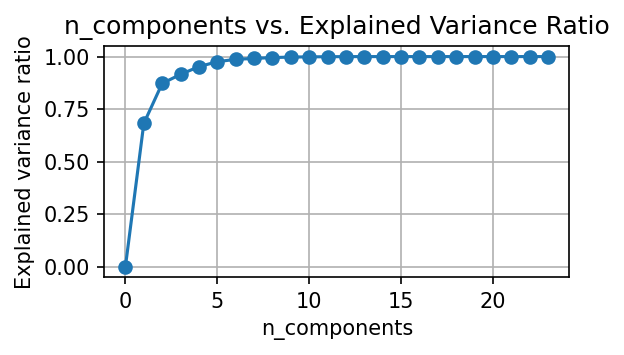

In [ ]:
nums = np.arange(len(list(df_pca.columns)))

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_pca)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
var_ratio

[0.0,
 0.6815490232504293,
 0.8721520340914065,
 0.9153075370117731,
 0.952129815893426,
 0.9756371127619085,
 0.9869620545271148,
 0.9911334394850346,
 0.9952632461254549,
 0.9976344303963327,
 0.9986792514431828,
 0.9993454625489322,
 0.9998107595323107,
 0.9999127309809663,
 0.9999579693554514,
 0.9999897855856871,
 0.9999955378409178,
 0.9999980240210524,
 0.9999991246622378,
 0.9999998974584277,
 0.9999999691686645,
 0.9999999901203493,
 0.9999999962983611,
 0.9999999999983292]

In [ ]:
pca = PCA(n_components=3) # 95.7 % of explained variance
pca.fit(df_pca)
array_pca = pca.transform(df_pca)

In [ ]:
top_3_indices = np.argsort(pca.components_, axis=1)[:, -3:][:, ::-1]
print(top_3_indices)
most_important_words = [[list(df_pca.columns)[idx_f] for idx_f in top_3_indices[pca_idx]] for pca_idx in range(3)]
print(most_important_words)



[[17  5 20]
 [13  1  7]
 [23 17  5]]
[['rouge-s2-f', 'rouge-2-f', 'rouge-su2-f'], ['rouge-w-1.2-r', 'rouge-1-r', 'rouge-3-r'], ['wmd', 'rouge-s2-f', 'rouge-2-f']]


In [ ]:
max_indices = np.argmax(pca.components_, axis=1)
print([list(df_pca.columns)[idx] for idx in max_indices])

['rouge-s2-f', 'rouge-w-1.2-r', 'wmd']


In [ ]:
df_res_pca = pd.DataFrame(array_pca,columns=['PC1','PC2','PC3'])
df_res_pca['label'] = [elmt[:2] for elmt in list(df_pca.index)]
df_res_pca

,PC1,PC2,PC3,label
0,1.023060,0.515441,-1.260155,RA
1,-3.841717,-1.326954,-1.011414,RA
2,-4.868719,-0.112263,-1.008134,RA
3,8.701598,-2.231159,-0.800977,RA
4,7.518606,-1.581766,-1.236179,RA
5,-3.123373,-2.800130,-1.389509,RA
6,4.853447,0.017398,-0.305734,RA
7,-0.315234,0.572756,0.037022,RA
8,2.951141,1.200985,-0.364453,RA
9,0.271705,2.615550,-1.636424,RA


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

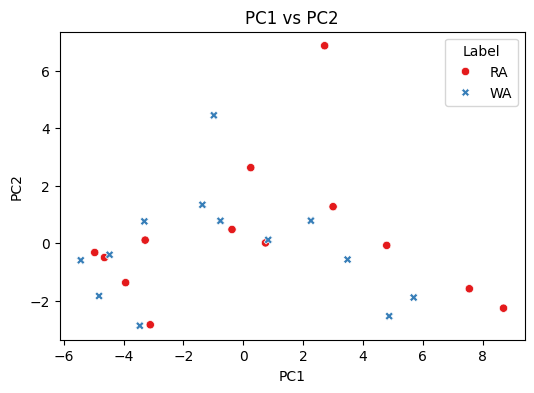

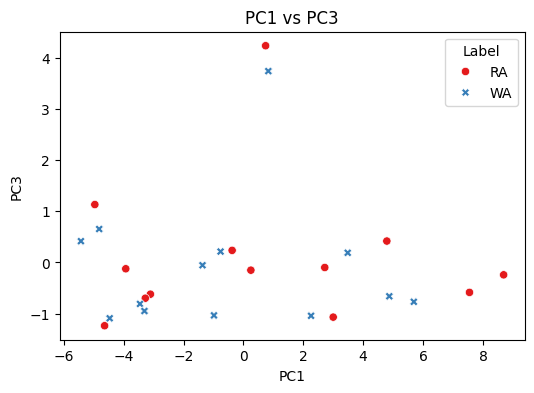

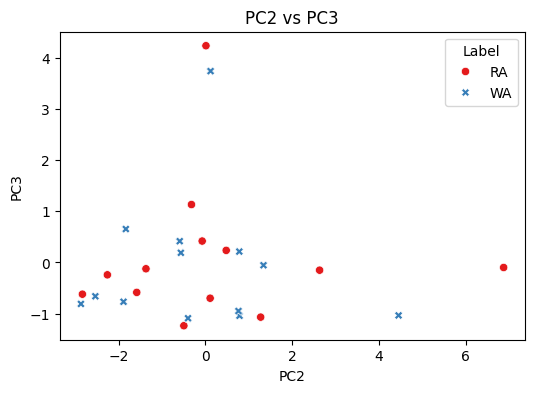

In [ ]:
numeric_columns = ['PC1','PC2','PC3']

# Create 2D scatter plots for all pairs of variables
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            data=df_res_pca,
            x=numeric_columns[i],
            y=numeric_columns[j],
            hue='label',  # Color by label
            palette='Set1',
            style='label',  # Optional: Different marker styles for labels
        )
        plt.title(f'{numeric_columns[i]} vs {numeric_columns[j]}')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.legend(title='Label')
        plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)



# Create a 3D scatter plot
fig = px.scatter_3d(df_res_pca, x='PC1', y='PC2', z='PC3', color='label', title='3D Scatter Plot with Labels')

# Show the plot
fig.show()


  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
data_score = pd.read_csv(root_path + "/data/score.csv", header= 0)

In [ ]:
try:
  data_score['label'] = [elmt[:2] for elmt in list(data_score.index)]
except:
  data_score['label'] = [elmt[:2] for elmt in data_score[['Unnamed: 0']].values.flatten().tolist()]

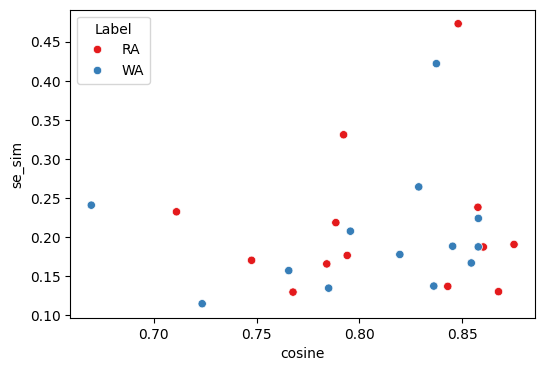

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=data_score,
    x=data_score['cosine'],
    y=data_score['se_sim'],
    hue='label',  # Color by label
    palette='Set1',
)
plt.legend(title='Label')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data_score, x='cosine', y='wmd', z='se_sim', color='label', title='3D Scatter Plot with Labels')

# Show the plot
fig.show()

In [ ]:
ref_txt = clean_txt(ast.literal_eval(data.data.iloc[0].answer_ref)[0])
wrong_txt = clean_txt(ast.literal_eval(data.data.iloc[0].wrong_answer_ref)[0])
gen_txt = clean_txt(data.data.iloc[0].generated_answer)

distance1 = model_w2v.wmdistance(gen_txt.text.split(), ref_txt.text.split())
distance2 = model_w2v.wmdistance(gen_txt.text.split(), wrong_txt.text.split())

print(distance1)
print(distance2)

0.9023873182449643
0.9283529599751343


In [ ]:
!pip install spacy

In [ ]:
import spacy

# Load pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Example text
text = "The CAC 40 index started at 1,000 in 1987 and rose to 7,000 in 2021."

# Process text
doc = nlp(text)

# Extract Named Entities
print("Named Entities, their labels, and positions:")



/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Named Entities, their labels, and positions:
CAC (ORG) - Start: 4, End: 7
40 (CARDINAL) - Start: 8, End: 10
1,000 (CARDINAL) - Start: 28, End: 33
1987 (DATE) - Start: 37, End: 41
7,000 (CARDINAL) - Start: 54, End: 59
2021 (DATE) - Start: 63, End: 67


In [ ]:
s1 = clean_txt(ast.literal_eval(data.data.iloc[0].answer_ref)[0])
s2 = clean_txt(ast.literal_eval(data.data.iloc[0].wrong_answer_ref)[0])

NameError: name 'data' is not defined

In [ ]:
nltk.download('punkt_tab ')

[nltk_data] Error loading punkt_tab : Package 'punkt_tab ' not found
[nltk_data]     in index


False

In [ ]:
# Example texts
text1 = """The economy is improving.
            Inflation is decreasing, and jobs are being created.
            Experts predict further growth in the coming months."""

text2 = """Economic conditions are getting better.
            Job opportunities are increasing as inflation slows down.
            Job opportunities are drastically increasing consequently to the inflation slowing down.
            Analysts foresee continued expansion soon."""

# Split texts into sentences
sentences1 = sent_tokenize(text1)
sentences2 = sent_tokenize(text2)

# Generate sentence embeddings
embeddings1 = model_SE.encode(sentences1)
embeddings2 = model_SE.encode(sentences2)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings1, embeddings2)

# Compute overall similarity (average of max similarities per sentence)
max_similarities = np.max(similarity_matrix, axis=1)  # Best match per sentence
overall_similarity = np.mean(max_similarities)  # Average max similarity

# Print similarity results
print(f"Overall Similarity Score: {overall_similarity:.4f}")

# Interpretation
if overall_similarity > 0.8:
    print("The texts convey the same overall message.")
elif overall_similarity > 0.5:
    print("The texts are somewhat similar but may differ in details.")
else:
    print("The texts have different messages.")


Overall Similarity Score: 0.8235
The texts convey the same overall message.


In [ ]:
test = clean_txt(text1)

In [ ]:
dir(test)

['NER',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alphanum_only',
 'alphnum_text',
 'alphnum_text_S',
 'get_sentence_embedding',
 'get_word_embedding',
 'lemmatizer_fct',
 'light_preprocessing',
 'rm_stop_word',
 'sentence_embedding',
 'text',
 'word_embedding',
 'word_tokenized_text']

In [ ]:
test.sentence_embedding.shape

(3, 768)

In [ ]:
test2 = clean_txt(text2)

In [ ]:
.shape

(4, 768)

In [ ]:
mtx_test = cosine_similarity(test.sentence_embedding, test2.sentence_embedding)

In [ ]:
def get_Sbased_similarity(data):

  data_res = [['image_id',"similarity"]]

  for i in tqdm(data.index.tolist()):

    row = data.loc[i]
    res_temp = []

    clean_gen = clean_txt(row.generated_answer)
    ref_emmbedding = np.array(clean_gen.emmbedding)

    answer_ref_list = ast.literal_eval(row.answer_ref) if type(row.answer_ref) == str else row.answer_ref

    for j in ast.literal_eval(row.answer_ref):
      clean_gen = clean_txt(j)
      gen_emmbedding = np.array(clean_gen.emmbedding)

      res_temp.append(np.dot(ref_emmbedding, gen_emmbedding)/(np.linalg.norm(ref_emmbedding)*np.linalg.norm(gen_emmbedding)))
    data_res.append([i,np.array(res_temp).mean()])

  return pd.DataFrame(data_res[1:] , columns = data_res[0]).set_index('image_id')

array([[0.9288921 , 0.67798257, 0.6385718 , 0.4213481 ],
       [0.7777113 , 0.75265765, 0.7236303 , 0.30289164],
       [0.45030257, 0.47018713, 0.5031637 , 0.7637648 ]], dtype=float32)

In [ ]:
test2.word_tokenized_text

['analyst',
 'get',
 'condition',
 'foresee',
 'soon',
 'opportunity',
 'well',
 'slow',
 'job',
 'drastically',
 'expansion',
 'economic',
 'inflation',
 'consequently',
 'continue',
 'increase']

In [ ]:
def get_embedding_score(data):

  res1_wa = []
  res1_ra = []

  res2_wa = []
  res2_ra = []

  for i in tqdm(range(data.shape[0])):
    score1_wa = 0
    score1_ra = 0

    score2_wa = 0
    score2_ra = 0

    for j in range(3):
      ref_txt = clean_txt(ast.literal_eval(data.iloc[i].answer_ref)[j])
      wrong_txt = clean_txt(ast.literal_eval(data.iloc[i].wrong_answer_ref)[j])
      gen_txt = clean_txt(data.iloc[0].generated_answer)

      distance1 = model_w2v.wmdistance(gen_txt.word_tokenized_text, ref_txt.word_tokenized_text)
      distance2 = model_w2v.wmdistance(gen_txt.word_tokenized_text, wrong_txt.word_tokenized_text)

      score1_wa += distance2
      score1_ra += distance1

      similarity_matrix_ra = cosine_similarity(gen_txt.sentence_embedding, ref_txt.sentence_embedding)
      similarity_matrix_wa = cosine_similarity(gen_txt.sentence_embedding, wrong_txt.sentence_embedding)

      max_similarities_ra = np.max(similarity_matrix_ra, axis=1)
      max_similarities_wa = np.max(similarity_matrix_wa, axis=1)

      score2_ra += np.mean(max_similarities_ra)
      score2_wa += np.mean(max_similarities_wa)


    score1_wa = score1_wa/3
    score1_ra = score1_ra/3

    score2_wa = score2_wa/3
    score2_ra = score2_ra/3

    res1_wa.append(score1_wa)
    res1_ra.append(score1_ra)

    res2_wa.append(score2_wa)
    res2_ra.append(score2_ra)

  return res1_wa,res1_ra,res2_wa,res2_ra

['RA_curve_1',
 'RA_curve_2',
 'RA_curve_3',
 'RA_graph_1',
 'RA_graph_2',
 'RA_graph_3',
 'RA_tab_1',
 'RA_tab_2',
 'RA_tab_3',
 'RA_curve_4',
 'RA_curve_5',
 'RA_graph_4',
 'RA_graph_5',
 'WA_curve_1',
 'WA_curve_2',
 'WA_curve_3',
 'WA_graph_1',
 'WA_graph_2',
 'WA_graph_3',
 'WA_tab_1',
 'WA_tab_2',
 'WA_tab_3',
 'WA_curve_4',
 'WA_curve_5',
 'WA_graph_4',
 'WA_graph_5']

In [ ]:
data_test= data_score.copy()
data_test = data_test[["label","wmd",'se_sim']]
data_test['item'] = [elmt[3:] for elmt in list(data_score.index)]

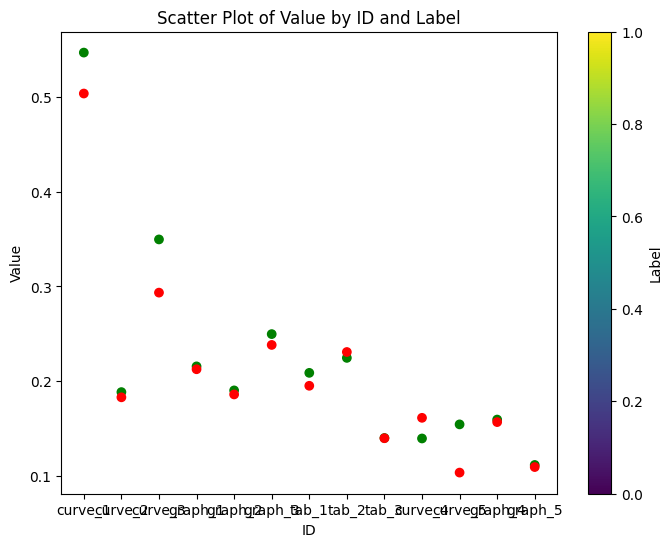

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot: `id` on x-axis, `value` on y-axis, color by `label`
scatter = ax.scatter(data_test['item'], data_test['se_sim'], c=data_test['label'].map({'RA': 'green', 'WA': 'red'}))


# Add color bar for the labels
plt.colorbar(scatter, ax=ax, label='Label')

# Labeling the axes and title
ax.set_xlabel('ID')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot of Value by ID and Label')

# Show plot
plt.show()

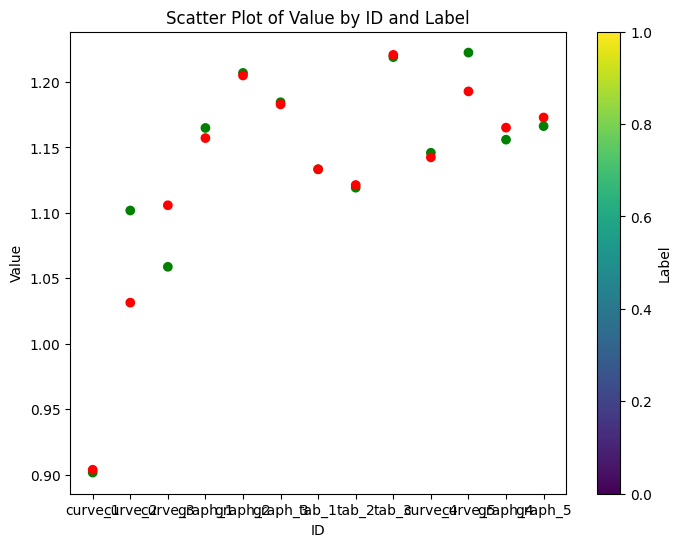

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot: `id` on x-axis, `value` on y-axis, color by `label`
scatter = ax.scatter(data_test['item'], data_test['wmd'], c=data_test['label'].map({'RA': 'green', 'WA': 'red'}))


# Add color bar for the labels
plt.colorbar(scatter, ax=ax, label='Label')

# Labeling the axes and title
ax.set_xlabel('ID')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot of Value by ID and Label')

# Show plot
plt.show()

In [ ]:
data_score = pd.read_csv(root_path + "/data/score.csv", header= 0)
data_score.index = data_score[[data_score.columns[1]]].values.flatten().tolist()

NameError: name 'pd' is not defined

            Unnamed: 0.1  Unnamed: 0  rouge-1-p  rouge-1-r  rouge-1-f  \
RA_curve_1             0  RA_curve_1   0.178788   0.561905   0.271264   
RA_curve_2             1  RA_curve_2   0.125000   0.366667   0.186441   
RA_curve_3             2  RA_curve_3   0.083688   0.357576   0.135632   
RA_graph_1             3  RA_graph_1   0.325203   0.555556   0.410256   
RA_graph_2             4  RA_graph_2   0.282258   0.532995   0.369069   

            rouge-2-p  rouge-2-r  rouge-2-f  rouge-3-p  rouge-3-r  ...  \
RA_curve_1   0.060883   0.193237   0.092593   0.029052   0.093137  ...   
RA_curve_2   0.013333   0.039548   0.019943   0.000000   0.000000  ...   
RA_curve_3   0.011396   0.049383   0.018519   0.002861   0.012579  ...   
RA_graph_1   0.151329   0.259649   0.191214   0.092593   0.159574  ...   
RA_graph_2   0.151762   0.288660   0.198934   0.057377   0.109948  ...   

            rouge-s2-r  rouge-s2-f  rouge-su2-p  rouge-su2-r  rouge-su2-f  \
RA_curve_1    0.166667    0.079254     

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

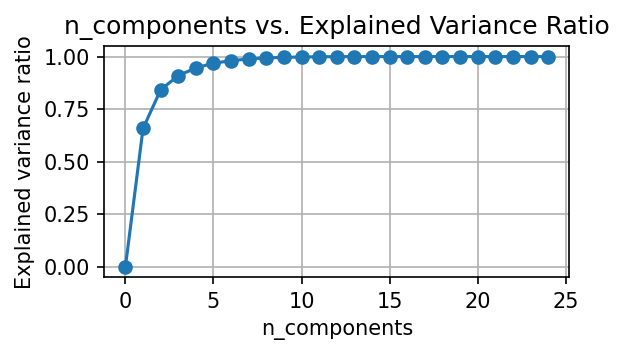

In [ ]:
from sklearn.preprocessing import StandardScaler


print(data_score.head())

data_score = data_score.drop(columns=['Unnamed: 0.1','Unnamed: 0','label'])

df_pca = data_score.copy()#[[col_name for col_name in data_score.columns if re.findall("f$", col_name)]]
scaler = StandardScaler()

df_pca = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns, index=df_pca.index)

nums = np.arange(len(list(df_pca.columns)))

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_pca)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
df_pca.columns

Index(['rouge-1-p', 'rouge-1-r', 'rouge-1-f', 'rouge-2-p', 'rouge-2-r',
       'rouge-2-f', 'rouge-3-p', 'rouge-3-r', 'rouge-3-f', 'rouge-l-p',
       'rouge-l-r', 'rouge-l-f', 'rouge-w-1.2-p', 'rouge-w-1.2-r',
       'rouge-w-1.2-f', 'rouge-s2-p', 'rouge-s2-r', 'rouge-s2-f',
       'rouge-su2-p', 'rouge-su2-r', 'rouge-su2-f', 'bleu_score', 'cosine',
       'wmd', 'se_sim'],
      dtype='object')

In [ ]:
pca = PCA(n_components=3) # 95.7 % of explained variance
pca.fit(df_pca)
array_pca = pca.transform(df_pca)

top_3_indices = np.argsort(pca.components_, axis=1)[:, -3:][:, ::-1]
print(top_3_indices)
most_important_words = [[list(df_pca.columns)[idx_f] for idx_f in top_3_indices[pca_idx]] for pca_idx in range(3)]
print(most_important_words)



df_res_pca = pd.DataFrame(array_pca,columns=['PC1','PC2','PC3'])
df_res_pca['label'] = [elmt[:2] for elmt in list(df_pca.index)]
df_res_pca

import plotly.express as px

fig = px.scatter_3d(df_res_pca, x='PC1', y='PC2', z='PC3', color='label', title='3D Scatter Plot with Labels')

# Show the plot
fig.show()

[[17  5 20]
 [13  4  1]
 [24  1 10]]
[['rouge-s2-f', 'rouge-2-f', 'rouge-su2-f'], ['rouge-w-1.2-r', 'rouge-2-r', 'rouge-1-r'], ['se_sim', 'rouge-1-r', 'rouge-l-r']]


# LLM as a judge

## GPT4all

In [ ]:
!pip install gpt4all

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.1 MB/s eta 0:00:00


In [ ]:
from gpt4all import GPT4All
model_gpt4all = GPT4All("Meta-Llama-3-8B-Instruct.Q4_0.gguf") # downloads / loads a 4.66GB LLM

Downloading: 100%|██████████| 4.66G/4.66G [02:23<00:00, 32.6MiB/s]
Verifying: 100%|██████████| 4.66G/4.66G [00:22<00:00, 204MiB/s]


In [ ]:
def generate_prompt(gen_txt,comp):


  # prompt = f"""
  # Answer only with yes or no, do these two texts have the same overall meaning ? You have to overlook the level of detail and focusing on the overall message. Here are the two sentences: "{gen_txt}" , "{comp}"
  # """

  prompt = f"""
    Answer only with "yes" or "no". Do these two texts have the same overall meaning? Ignore differences in detail, style, or length. However, if they contain contradictory information or any shared information is not identical, answer "no". Here are the two texts: "{gen_txt}" , "{comp}"
    """



  return prompt



In [ ]:
data.data.index.tolist()

['curve_1',
 'curve_2',
 'curve_3',
 'graph_1',
 'graph_2',
 'graph_3',
 'tab_1',
 'tab_2',
 'tab_3',
 'curve_4',
 'curve_5',
 'graph_4',
 'graph_5']

In [ ]:
import json

checkpoint_root = root_path + "/llm_as_judge/"+ "gpt4all_checkpoint/"
os.makedirs(checkpoint_root, exist_ok=True)

res = {}
for idx in tqdm(range(data.data.shape[0]-1,data.data.shape[0])):

  gen_txt = data.data.iloc[idx].generated_answer

  res_ra = []
  res_wa = []
  for i in tqdm(range(3)):
    comp_ra = ast.literal_eval(data.data.iloc[idx].answer_ref)[i]
    comp_wa = ast.literal_eval(data.data.iloc[idx].wrong_answer_ref)[i]

    prompt_ra = generate_prompt(gen_txt,comp_ra)
    prompt_wa = generate_prompt(gen_txt,comp_wa)

    with model_gpt4all.chat_session():
      res_ra.append(model_gpt4all.generate(prompt_ra))

    with model_gpt4all.chat_session():
      res_wa.append(model_gpt4all.generate(prompt_wa))


  with open(checkpoint_root + f"checkpoint_prompt_2_{data.data.index.tolist()[idx]}.json", "w") as json_file:
    json.dump({data.data.index.tolist()[idx]:[res_ra,res_wa]}, json_file, indent=4)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]